# Logistic Regression

### Classification vs. Regression

---
- In the previous unit, you learned about one of the supervised learning tasks called  linear regression where the goal was to predict a continuous real value (Price of house ) .
  
- In this unit, you will learn about another type of supervised learning task called classification.

- In classification, we predict a discrete value .
  
-  We are actually predicting which class a sample belongs to based on its features.

   For example, predicting if a person has a disease or not based on his health information .Here, having the disease can be      represented using a discrete value 1 and not having the disease can be represented using another discrete value of 0.

Similarly, here are some other simple examples of the classification problem :

  - **Predicting if an image is of a cat (0) or a dog (1),**  
  - **Predicting if a car will get sold (1) or not (0) based on the features and details of car,**  
  - **Classifying an email as spam (1) or not (0)**
  
#### Logistic regression is one of the basic classification algorithm.  

To better understand classification problems and logistic regression, we will start with a simple example. The example contains the SAT score of the students as a feature $x$ and a corresponding label $y$ with values 1 or 0 indicating the admission of the particular student to a university.
 
Here,
  
* 1 - The student gets admission
 
* 0 - The student does not get admission.



### Imports 

In [1]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt



### Data

In [2]:


data_path = "https://drive.google.com/uc?export=download&id=1rLEMxfeaQc64RPiPDzXBy7ipI-R-kIlI"

#data_path= "https://github.com/Aashishrimal/Logistic-Regression-/"

# Read the CSV data from the link
data_frame = pd.read_csv(data_path)

# Printfirst 5 samples from the DataFrame
data_frame.head()

,SAT Score,Admitted
0,1102,0
1,1435,1
2,1270,0
3,1106,0
4,1071,0


  
Based on the dataset generated above, the task here is to predict if a student gets admission or not given their SAT Score. 
Initially lets plot the data .

### Data visulization 

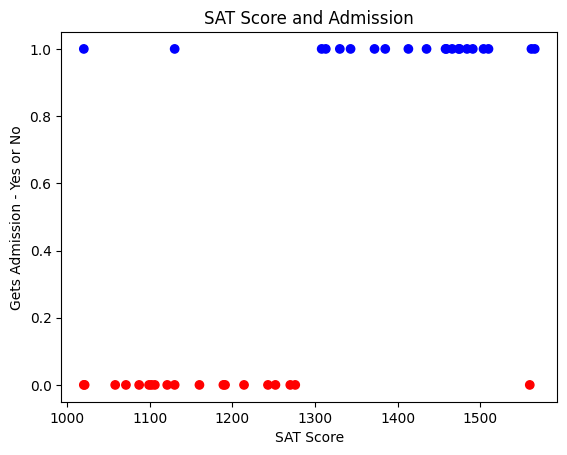

In [3]:
map_color = np.array(['r', 'b'])

x = data_frame.iloc[:, :-1].values
y = data_frame.iloc[:, 1].values

plt.scatter(data_frame['SAT Score'], data_frame['Admitted'], c=map_color[y])

plt.title('SAT Score and Admission')
plt.xlabel('SAT Score')
plt.ylabel('Gets Admission - Yes or No')
plt.savefig('sigmoid_data.png')
plt.show()



Initially lets see a function named Sigmoid Function.


$$f(z) = \frac 1 {(1+ e^{-z})} $$ $$    
       = \frac{e^z}{e^z + 1}  $$


 
where $z$ is any input real number. We can plot $f(z)$ as follows:

**Initially lets visualize a  function named Sigmoid function :**

<a data-flickr-embed="true" href="https://www.flickr.com/photos/200947226@N07/53845358796/in/dateposted-public/" title="sigmoid"><img src="https://live.staticflickr.com/65535/53845358796_f8714a4857_b.jpg" width="1024" height="307" alt="sigmoid"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

**Can you imagine fitting this graph  into the data mentioned in figure .?**

<div style="display: flex; justify-content: space-between;">
  <div style="margin-right: 10px;">
    <a data-flickr-embed="true" href="https://www.flickr.com/photos/200947226@N07/53847194057/in/dateposted-public/" title="sigmoid_data">
      <img src="https://live.staticflickr.com/65535/53847194057_fd1cf44f2e_z.jpg" width="320" height="240" alt="sigmoid_data"/>
    </a>
    <script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
  </div>
  <div>
    <a data-flickr-embed="true" href="https://www.flickr.com/photos/200947226@N07/53845358796/in/dateposted-public/" title="sigmoid">
      <img src="https://live.staticflickr.com/65535/53845358796_f8714a4857_b.jpg" width="790" height="240" alt="sigmoid"/>
    </a>
    <script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
  </div>
</div>



#### We can make  change in value of w and b so as to best fit the sigmoid curve into the data.


**Lets make some changes in the sigmoid function.**


****$$f(z) = \frac 1 {(1+ e^{-z})} $$ $$    
       = \frac{e^z}{e^z + 1}  $$****


**On multiplying z by m**


****$$f(z) = \frac 1 {(1+ e^{-mz})} $$ $$    
       = \frac{e^{mz}}{e^{mz} + 1}  $$****




**Lets visualize the change in the graph on multiplying  z by m .**  


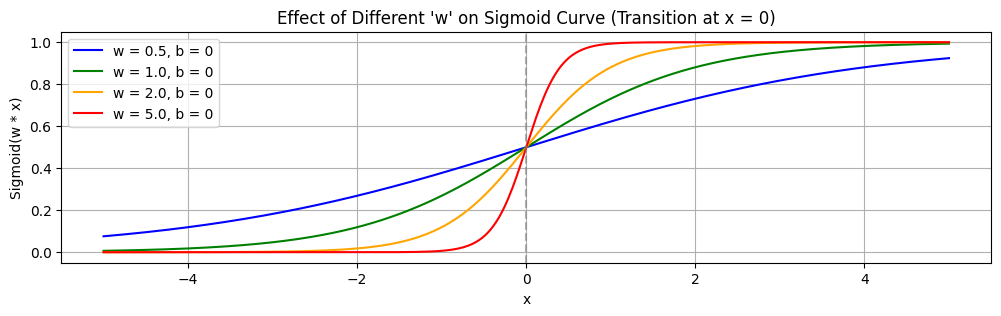

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# x range centered at transition = 0
x = np.linspace(-5, 5, 400)

# Different w values to show effect
w_values = [0.5, 1.0, 2.0, 5.0]
colors = ['blue', 'green', 'orange', 'red']

# Plot setup
plt.figure(figsize=(12, 3))
for w, color in zip(w_values, colors):
    z = w * x  # b = 0
    y = sigmoid(z)
    plt.plot(x, y, label=f'w = {w}, b = 0', color=color)

# Formatting
plt.title("Effect of Different 'w' on Sigmoid Curve (Transition at x = 0)")
plt.xlabel('x')
plt.ylabel('Sigmoid(w * x)')
plt.axvline(0, color='gray', linestyle='--', alpha=0.6)  # transition point
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.legend()
plt.show()


#### We can see ; increasing the value of m increase the slop in transition .

***Now lets see what happens if we add b to w.z    
i.e (w\*z + b )***

**On adding c to  w.z**


****$$f(z) = \frac 1 {(1+ e^{-(wz+b)})} $$ $$    
       = \frac{e^{wz+b}}{e^{wz+b} + 1}  $$****




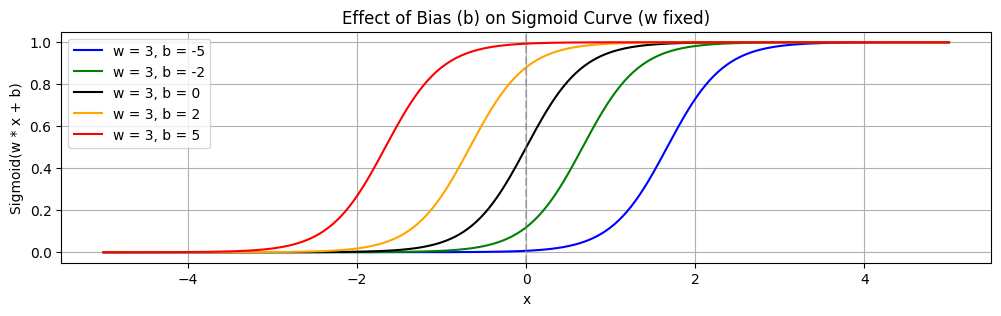

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Fixed weight
w = 3

# Bias values to test
bias_values = [-5, -2, 0, 2, 5]
colors = ['blue', 'green', 'black', 'orange', 'red']

# X range
x = np.linspace(-5, 5, 400)

# Plot setup
plt.figure(figsize=(12, 3))
for b, color in zip(bias_values, colors):
    y = sigmoid(w * x + b)
    plt.plot(x, y, label=f'w = {w}, b = {b}', color=color)

# Add transition reference line
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)

# Final formatting
plt.title("Effect of Bias (b) on Sigmoid Curve (w fixed)")
plt.xlabel("x")
plt.ylabel("Sigmoid(w * x + b)")
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.legend()
plt.show()


#### Keypoint :  Changing the value of w shifts the logistic curve .

- Now you might be clear regarding how the change is made in simplest form of sigmoid function to make best fit.  
- But this work of finding the value of m and c to best fit the data is not performed by us ; it is the job of computer.  
- Computer finds the best value of m and c  using gradient descent similar  to  the way it's done in linear Regression  .  
- Instead of using SSE as loss in Linear Regression , we use Binary Cross Entroy Loss function .  

****Well ,  
What is Binary Cross Entropy Loss Function**** ? .  
For each data point , 

****$$ \mathcal{L}(y, \hat{y}) = -\left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right) $$****
 where ,  
 $y$ is the true label (either 0 or 1),

$\hat{y}$ is the predicted probability (output of the logistic function).  


      

### Total Loss : 
****$$ J  = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]$$****

Where ,   
*m is the number of training examples,*

*$y^{(i)}$ is the true label for the i-th example*

*$\hat{y}^{(i)}$ 
  is the predicted probability for the i-th example.*


##### Now the value of m and c is obtained using `Gradient Descent` so as to minimize the value of Total Loss.
###### Refer to Chapter - Simple Linear Regression in this Course to get insight regarding Gradient Descent 


### Change the values of w and b to make the graph best fit the data. 

In [6]:
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

# --- Mouse Obesity Dataset ---
np.random.seed(42)
transition = 0.035
n_per_class = 20

non_obese_weights = np.random.uniform(0.025, 0.034, n_per_class - 1)
non_obese_labels = np.zeros(n_per_class - 1)

obese_weights = np.random.uniform(0.036, 0.045, n_per_class - 1)
obese_labels = np.ones(n_per_class - 1)

outlier_obese = np.random.uniform(0.034, 0.035, 1)
outlier_obese_labels = np.ones(1)

outlier_non_obese = np.random.uniform(0.035, 0.036, 1)
outlier_non_obese_labels = np.zeros(1)

weights = np.concatenate([
    non_obese_weights,
    outlier_obese,
    obese_weights,
    outlier_non_obese
])
labels = np.concatenate([
    non_obese_labels,
    outlier_obese_labels,
    obese_labels,
    outlier_non_obese_labels
])

sort_idx = np.argsort(weights)
weights = weights[sort_idx]
labels = labels[sort_idx]

# --- Optimized Logistic Functions ---
def safe_sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

# --- Newton's Method for Optimal Fit ---
def newton_method(X, y):
    X = np.column_stack([np.ones(X.shape[0]), X])
    beta = np.zeros(X.shape[1])
    for _ in range(10):
        p = safe_sigmoid(X @ beta)
        p = np.clip(p, 1e-15, 1-1e-15)
        W = np.diag(p * (1 - p))
        gradient = X.T @ (y - p)
        try:
            hessian = X.T @ W @ X
            delta = np.linalg.solve(hessian, gradient)
            beta += delta
            if np.linalg.norm(delta) < 1e-6:
                break
        except np.linalg.LinAlgError:
            break
    return beta[1], beta[0]

w_optimal, b_optimal = newton_method(weights.reshape(-1, 1), labels)


m = w_optimal * (-0.001)
b = b_optimal * 1.5  

# --- Create Interactive Figure ---
fig = go.FigureWidget()

# Add data points
fig.add_scatter(
    x=weights, y=labels, mode='markers',
    marker=dict(size=8, color='blue'),
    showlegend=False
)

# Create adaptive x-values with ultra-high density in transition region
transition_point = -b/m if m != 0 else 0
x_vals = np.concatenate([
    np.linspace(-100, transition_point - 0.1, 3000),
    np.linspace(transition_point - 0.1, transition_point + 0.1, 10000),  # Ultra-high density
    np.linspace(transition_point + 0.1, 100, 3000)
])

# Add perfectly smooth curve with spline interpolation
fig.add_scatter(
    x=x_vals,
    y=safe_sigmoid(m * x_vals + b),
    mode='lines',
    line=dict(
        color='red', 
        width=3,
        shape='spline',  # Natural curve smoothing
        smoothing=1.3    # Optimal smoothness
    ),
    showlegend=False
)

# Decision boundary
fig.add_vline(
    x=transition_point,
    line=dict(color="green", dash="dash", width=1.5),
    annotation_text=f"Decision Boundary: {transition_point:.5f} kg",
    annotation_position="top right"
)

# Layout configuration
fig.update_layout(
    title='Interactive Logistic Regression',
    xaxis_title='Weight (kg)',
    yaxis_title='Obesity Probability',
    xaxis=dict(
        range=[0.02, 0.05],  # Initial view matches original
        autorange=False,
        fixedrange=False  # Enable pan/zoom
    ),
    yaxis=dict(
        range=[-0.1, 1.1],
        fixedrange=True
    ),
    height=400,
    dragmode='pan',
    margin=dict(l=50, r=50, b=50, t=50)
)

# --- Interactive Controls ---
inc_m = widgets.Button(description='↑ m ', layout={'width': '100px'})
dec_m = widgets.Button(description='↓ m ', layout={'width': '100px'})
inc_b = widgets.Button(description='↑ b ', layout={'width': '100px'})
dec_b = widgets.Button(description='↓ b ', layout={'width': '100px'})

m_label = widgets.Label(value=f"Slope (m): {m:.2f}")
b_label = widgets.Label(value=f"Bias (b): {b:.2f}")

def update_plot():
    transition_point = -b/m if m != 0 else 0
    # Regenerate x-values to follow new transition point
    new_x = np.concatenate([
        np.linspace(-100, transition_point - 0.1, 3000),
        np.linspace(transition_point - 0.1, transition_point + 0.1, 10000),
        np.linspace(transition_point + 0.1, 100, 3000)
    ])
    
    with fig.batch_update():
        fig.data[1].x = new_x
        fig.data[1].y = safe_sigmoid(m * new_x + b)
        fig.layout.shapes[0].x0 = transition_point
        fig.layout.shapes[0].x1 = transition_point
        fig.layout.annotations[0].update(
            x=transition_point,
            text=f"Decision Boundary: {transition_point:.5f} kg"
        )
    
    m_label.value = f"Slope (m): {m:.2f}"
    b_label.value = f"Bias (b): {b:.2f}"

# Button handlers
inc_m.on_click(lambda _: (globals().update(m=m+200), update_plot()))
dec_m.on_click(lambda _: (globals().update(m=max(1, m-200)), update_plot()))
inc_b.on_click(lambda _: (globals().update(b=b+5), update_plot()))
dec_b.on_click(lambda _: (globals().update(b=b-5), update_plot()))

# Control panel
controls = widgets.VBox([
    widgets.HBox([dec_m, inc_m, m_label]),
    widgets.HBox([dec_b, inc_b, b_label]),
    widgets.Label("← → to pan | Scroll to zoom", 
                style={'font-style': 'italic', 'color': 'gray'})
])

# Display
display(controls)
display(fig)

# Print reference values
print(f"Optimal parameters: w = {w_optimal:.2f}, b = {b_optimal:.2f}")


FigureWidget({
    'data': [{'marker': {'color': 'blue', 'size': 8},
              'mode': 'markers',
              'showlegend': False,
              'type': 'scatter',
              'uid': '179bc627-57b3-48c7-92c4-29fb7b10eddb',
              'x': {'bdata': ('BXzfNyrKmT/uPFTtoiKaPwTYrCKjCZ' ... 'lgNyimP4RdnWPxzaY/SDRZqbLhpj8='),
                    'dtype': 'f8'},
              'y': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'AAAADwPwAAAAAAAPA/AAAAAAAA8D8='),
                    'dtype': 'f8'}},
             {'line': {'color': 'red', 'shape': 'spline', 'smoothing': 1.3, 'width': 3},
              'mode': 'lines',
              'showlegend': False,
              'type': 'scatter',
              'uid': 'daba60be-c894-4c4d-b9b2-e4062ecbaf4a',
              'x': {'bdata': ('AAAAAAAAWcDlFkhe/f5YwMstkLz6/V' ... 'ovfvlYQFJq7Re//FhAAAAAAAAAWUA='),
                    'dtype': 'f8'},
              'y': {'bdata': ('AAAAAAAA8D8AAAAAAADwPwAAAAAAAP' ... '2h+EwxJV5fONzXVy8liYd8PUlkLCU='),
   

Optimal parameters: w = 1945.39, b = -68.17


#### Note :
##### The 'w' determines the slope of transition portion of graph .   
##### The combined effect of 'w' and 'b' makes change in shifting of the graph . 

## Next Chapter on Multiple Features , Multiple classes 